In [174]:
__author__ = "Farzaneh Soltanzadeh"
__email__ = "f.soltanzadeh.f@gmail.com"
__organization__ = "Coursera"
__date__ = "2024-12"

Import Libraries 📚

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import plotly.graph_objs as go
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import plotly.express as px
from wordcloud import WordCloud


logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

### Dataset 📦 

In [176]:
df = pd.read_csv('Data/laptop_price - dataset.csv')
print(len(df))
df.head()

1275


,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


In [177]:
df.describe()

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro)
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,2.302980,8.440784,2.040525,1134.969059
std,1.429470,0.503846,5.097809,0.669196,700.752504
min,10.100000,0.900000,2.000000,0.690000,174.000000
25%,14.000000,2.000000,4.000000,1.500000,609.000000
50%,15.600000,2.500000,8.000000,2.040000,989.000000
75%,15.600000,2.700000,8.000000,2.310000,1496.500000
max,18.400000,3.600000,64.000000,4.700000,6099.000000


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4), int64(1), object(10)
me

Data Cleaning

In [179]:
df.isna().sum()

Company                0
Product                0
TypeName               0
Inches                 0
ScreenResolution       0
CPU_Company            0
CPU_Type               0
CPU_Frequency (GHz)    0
RAM (GB)               0
Memory                 0
GPU_Company            0
GPU_Type               0
OpSys                  0
Weight (kg)            0
Price (Euro)           0
dtype: int64

In [180]:
df.duplicated().sum()

np.int64(0)

Handle Outliers

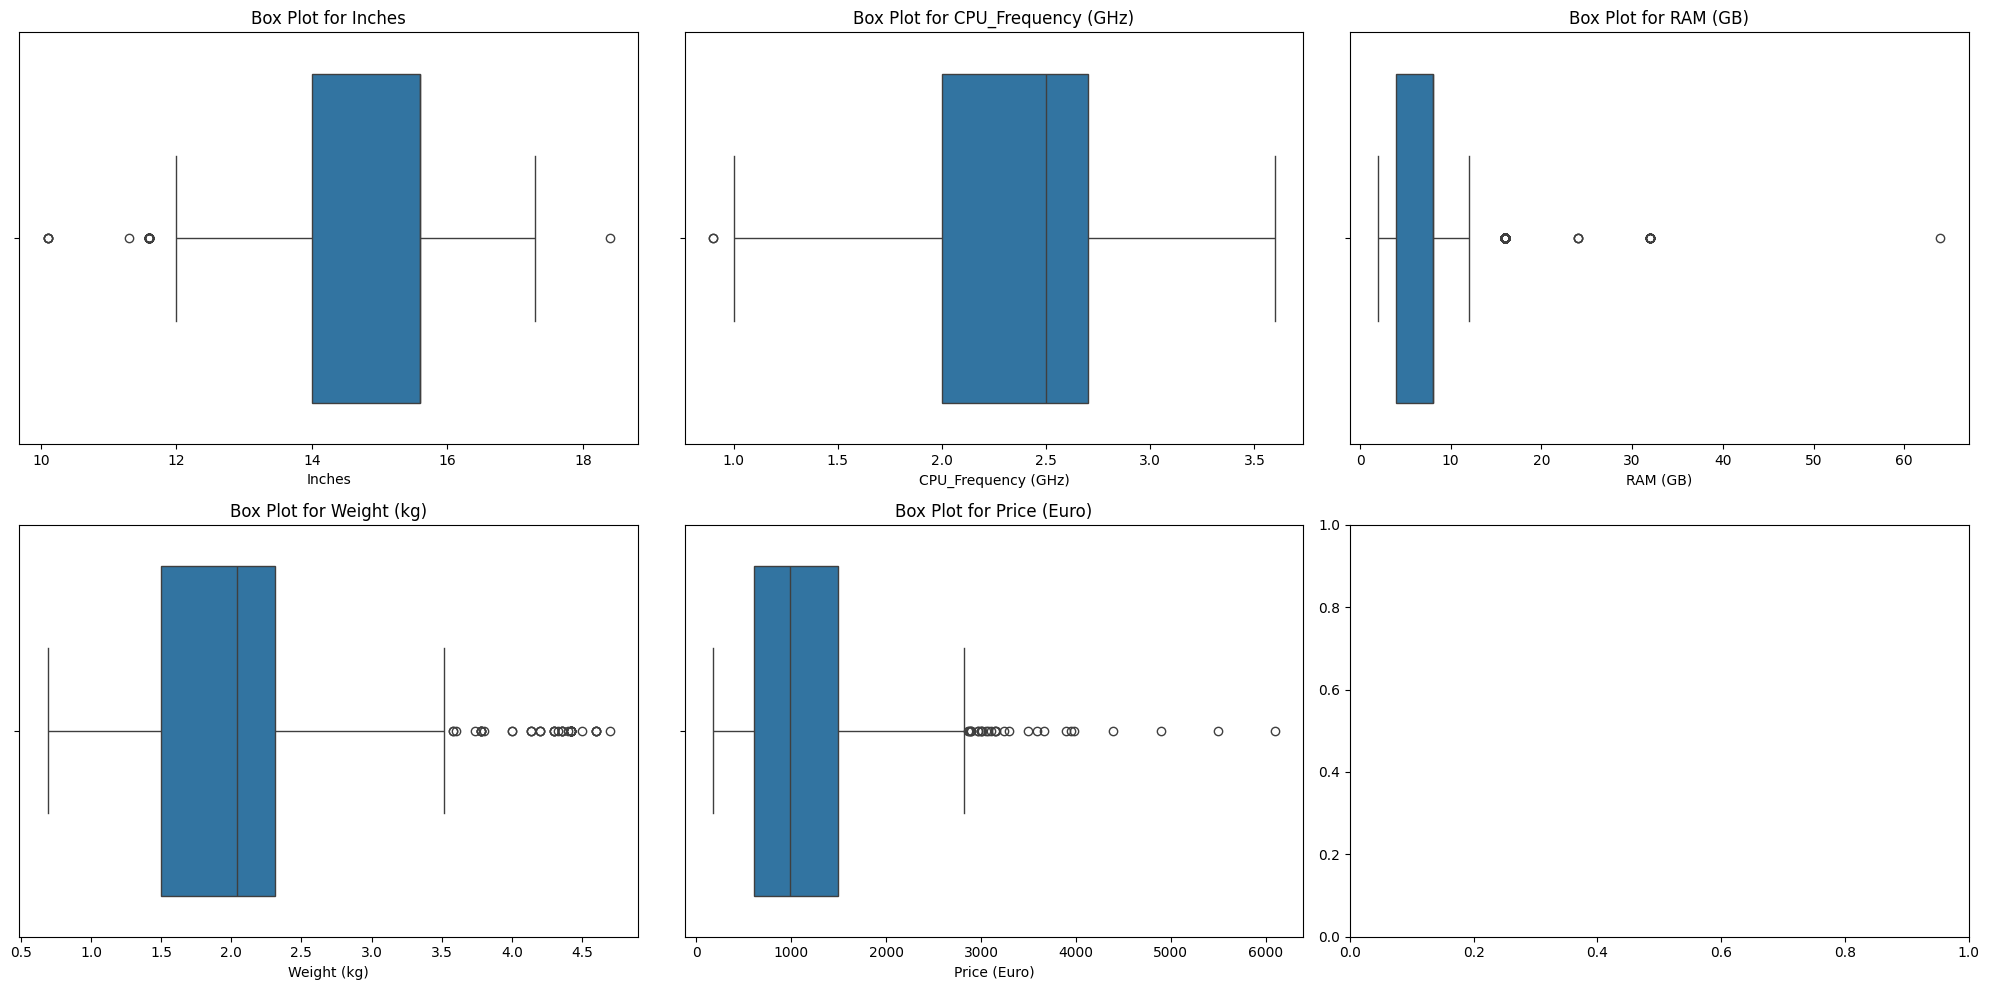

In [181]:
numerical_columns = df.select_dtypes(include=['number']).columns 

n_cols = (len(numerical_columns) + 1) // 2  
fig, axes = plt.subplots(nrows=2, ncols=n_cols, figsize=(20, 10))
axes = axes.flatten() # for easier iteration

for i, col in enumerate(numerical_columns):
    axes[i].set_title(f'Box Plot for {col}')
    sns.boxplot(x=df[col], ax=axes[i])
    
plt.tight_layout()
plt.show()


In [182]:
# for col in numerical_columns.drop('RAM (GB)'):
#     q1, q3= np.quantile(df[col],q = [0.25, 0.75])
#     iqr = q3 - q1
#     outlier_index = df[~((q1 - 1.5*iqr <= df[col]) & (df[col]<= q3 + 1.5*iqr))].index
#     print(f"{len(outlier_index)} outliers are removed from {col} column")
#     df.drop(outlier_index, inplace=True)

# print(f"Number of rows after outlier removal: {len(df)}")

### Exploratory Data Analysis (EDA)

In [183]:
def plot_horizontal_bar(axes, data, title="", xlabel="", ylabel="", color="gray", annotate=True):
    bars = axes.barh(data.index, 
                     data.values, 
                     color=color)
    if annotate:
        for bar in bars:
            axes.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f' {bar.get_width()}', va='center')
    axes.set_title(title)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)

def plot_WordCloud(axes, data, title="", width=800, height=400, colormap='inferno', background_color='white'):
    wordcloud = WordCloud(width=width, 
                          height=height, 
                          background_color=background_color, 
                          colormap=colormap, 
                          random_state=4).generate_from_frequencies(data)
    axes.imshow(wordcloud)
    axes.axis('off')
    axes.set_title(title)

def plot_sns_bar(axes, data, x, y, hue=None, legend=False, legLoc="upper right", title="", xlabel="", ylabel="", palette="viridis"):
    sns.barplot(data=data, x=x, y=y, hue=hue, palette=palette, ax=axes)
    axes.set_title(title)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    if legend:
        axes.legend(title=hue, loc=legLoc)

def plot_sns_count(axes, data, x, hue=None, title="", xlabel="", palette="Dark2"):
    sns.countplot(ax=axes, x=x, hue=hue, data=data, palette=palette)
    axes.set_title(title)
    axes.set_xlabel(xlabel)

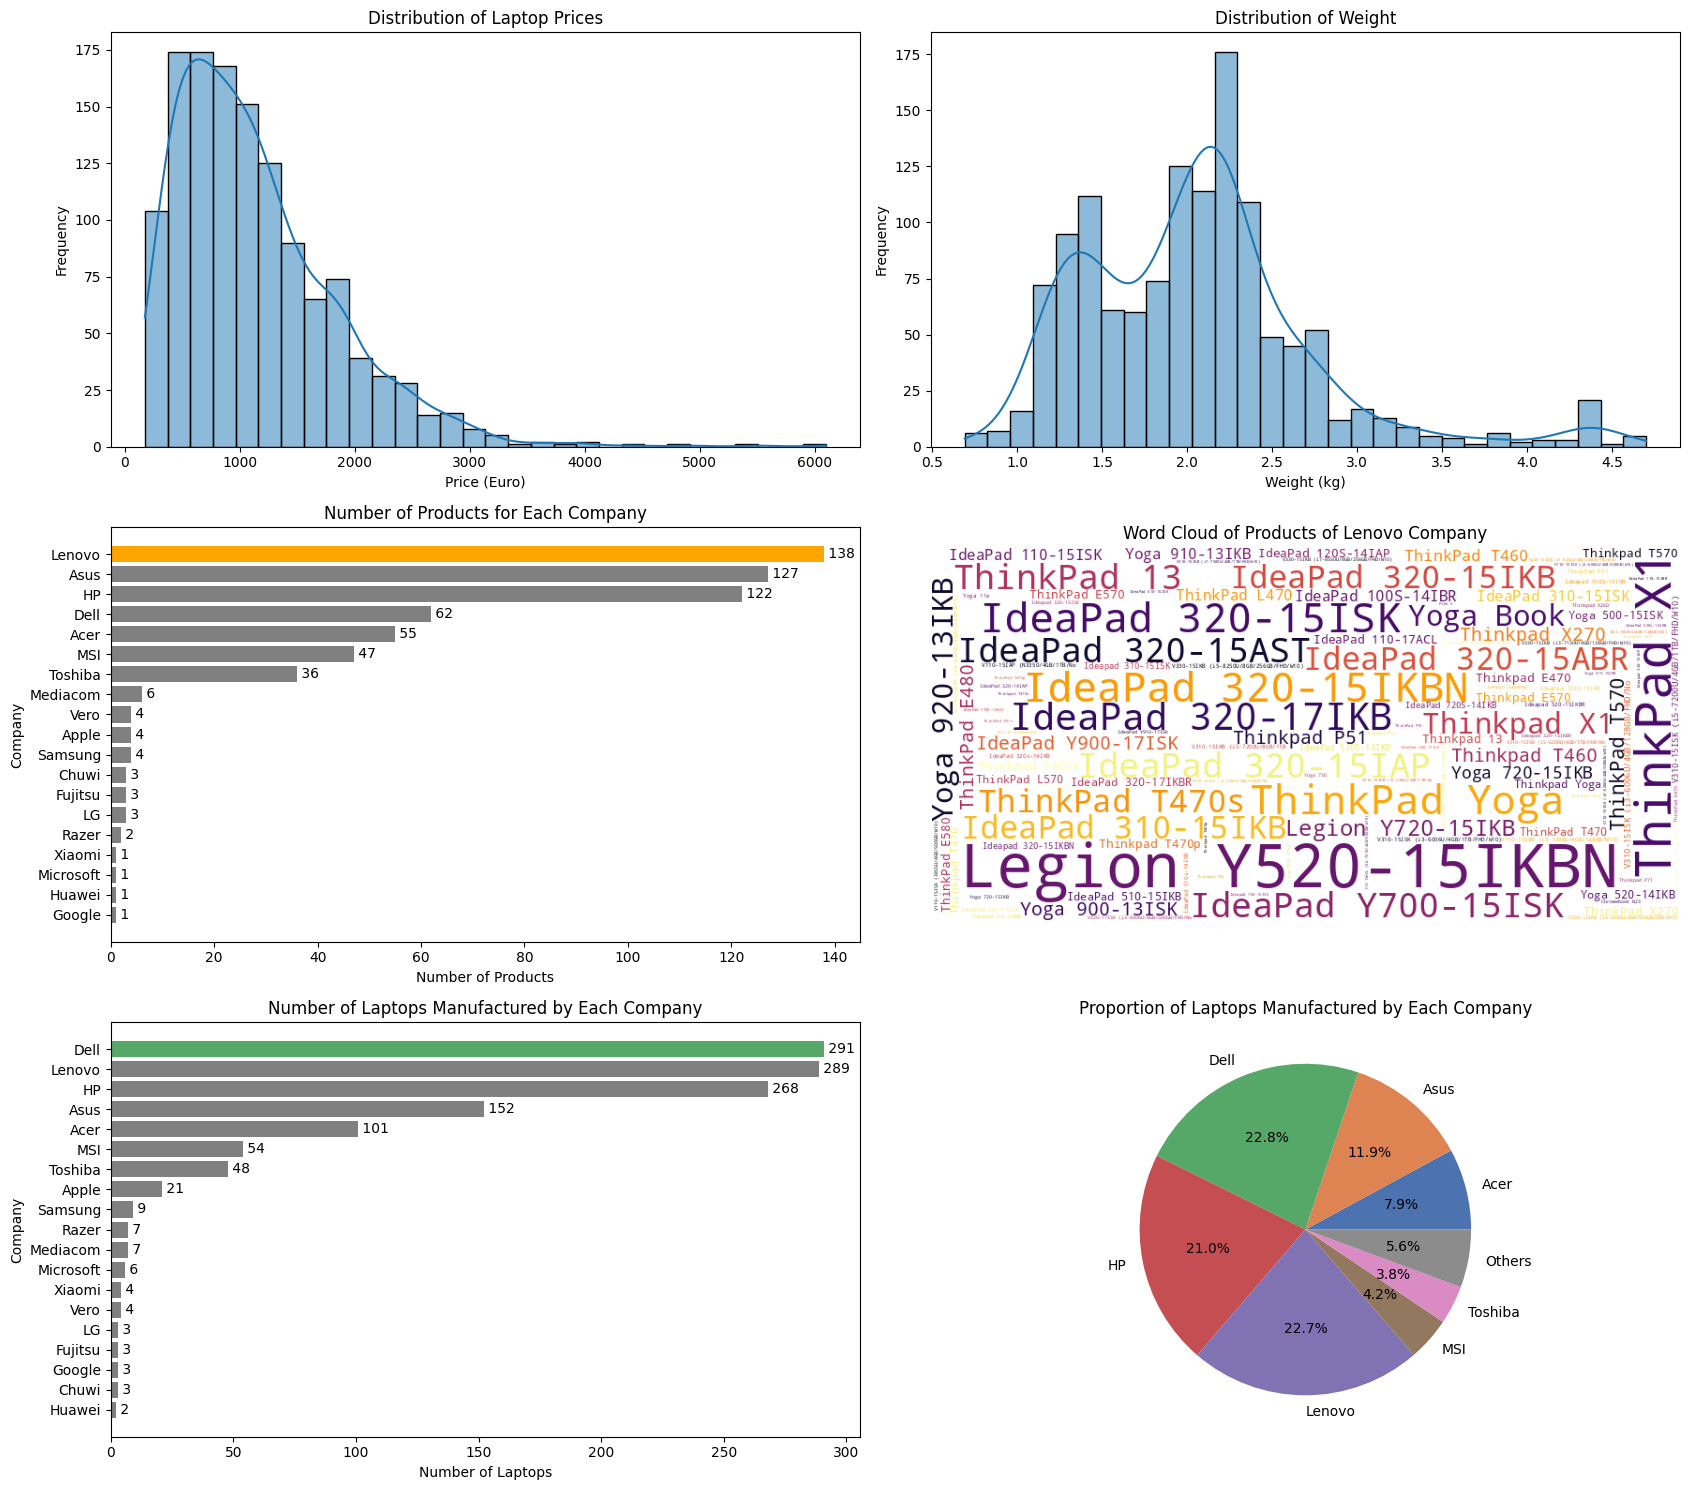

In [184]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(17, 15))
axes = axes.flatten()

# Plot 1
sns.histplot(df['Price (Euro)'], kde=True, bins=30, ax=axes[0]) 
axes[0].set_title('Distribution of Laptop Prices') 
axes[0].set_xlabel('Price (Euro)')  
axes[0].set_ylabel('Frequency')  

# Plot 2
sns.histplot(df['Weight (kg)'], kde=True, bins=30, ax=axes[1])
axes[1].set_title('Distribution of Weight')
axes[1].set_xlabel('Weight (kg)')
axes[1].set_ylabel('Frequency')

# Plot 3
cmp_prd = df.groupby(by="Company")["Product"].nunique().sort_values()
plot_horizontal_bar(axes[2], 
                    cmp_prd, 
                    title="Number of Products for Each Company", 
                    xlabel='Number of Products', ylabel='Company',
                    color= ['gray'] * (len(cmp_prd) - 1) + ['orange'])

# Plot 4
lenovo_products_count = df[df["Company"] == "Lenovo"]["Product"].value_counts()
plot_WordCloud(axes[3], 
               lenovo_products_count, 
               title='Word Cloud of Products of Lenovo Company')

# Plot 5
company_device_count = df.groupby(by="Company").size().sort_values()
plot_horizontal_bar(axes[4], 
                    company_device_count, 
                    title='Number of Laptops Manufactured by Each Company', 
                    xlabel='Number of Laptops', ylabel='Company',
                    color= ['gray'] * (len(company_device_count) - 1) + [sns.color_palette('deep')[2]])

# Plot 6
device_count = df.groupby(by="Company").size()
threshold = 30  # "Others" category
others = device_count[device_count < threshold].sum()
device_count = device_count[device_count >= threshold]
device_count['Others'] = others

axes[5].pie(device_count.values, 
            labels=device_count.index, 
            autopct='%1.1f%%', 
            colors=sns.color_palette('deep', len(device_count)))
axes[5].set_title('Proportion of Laptops Manufactured by Each Company')

plt.tight_layout() # prevents overlap
plt.show()

/tmp/ipykernel_52332/2027394269.py:18: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



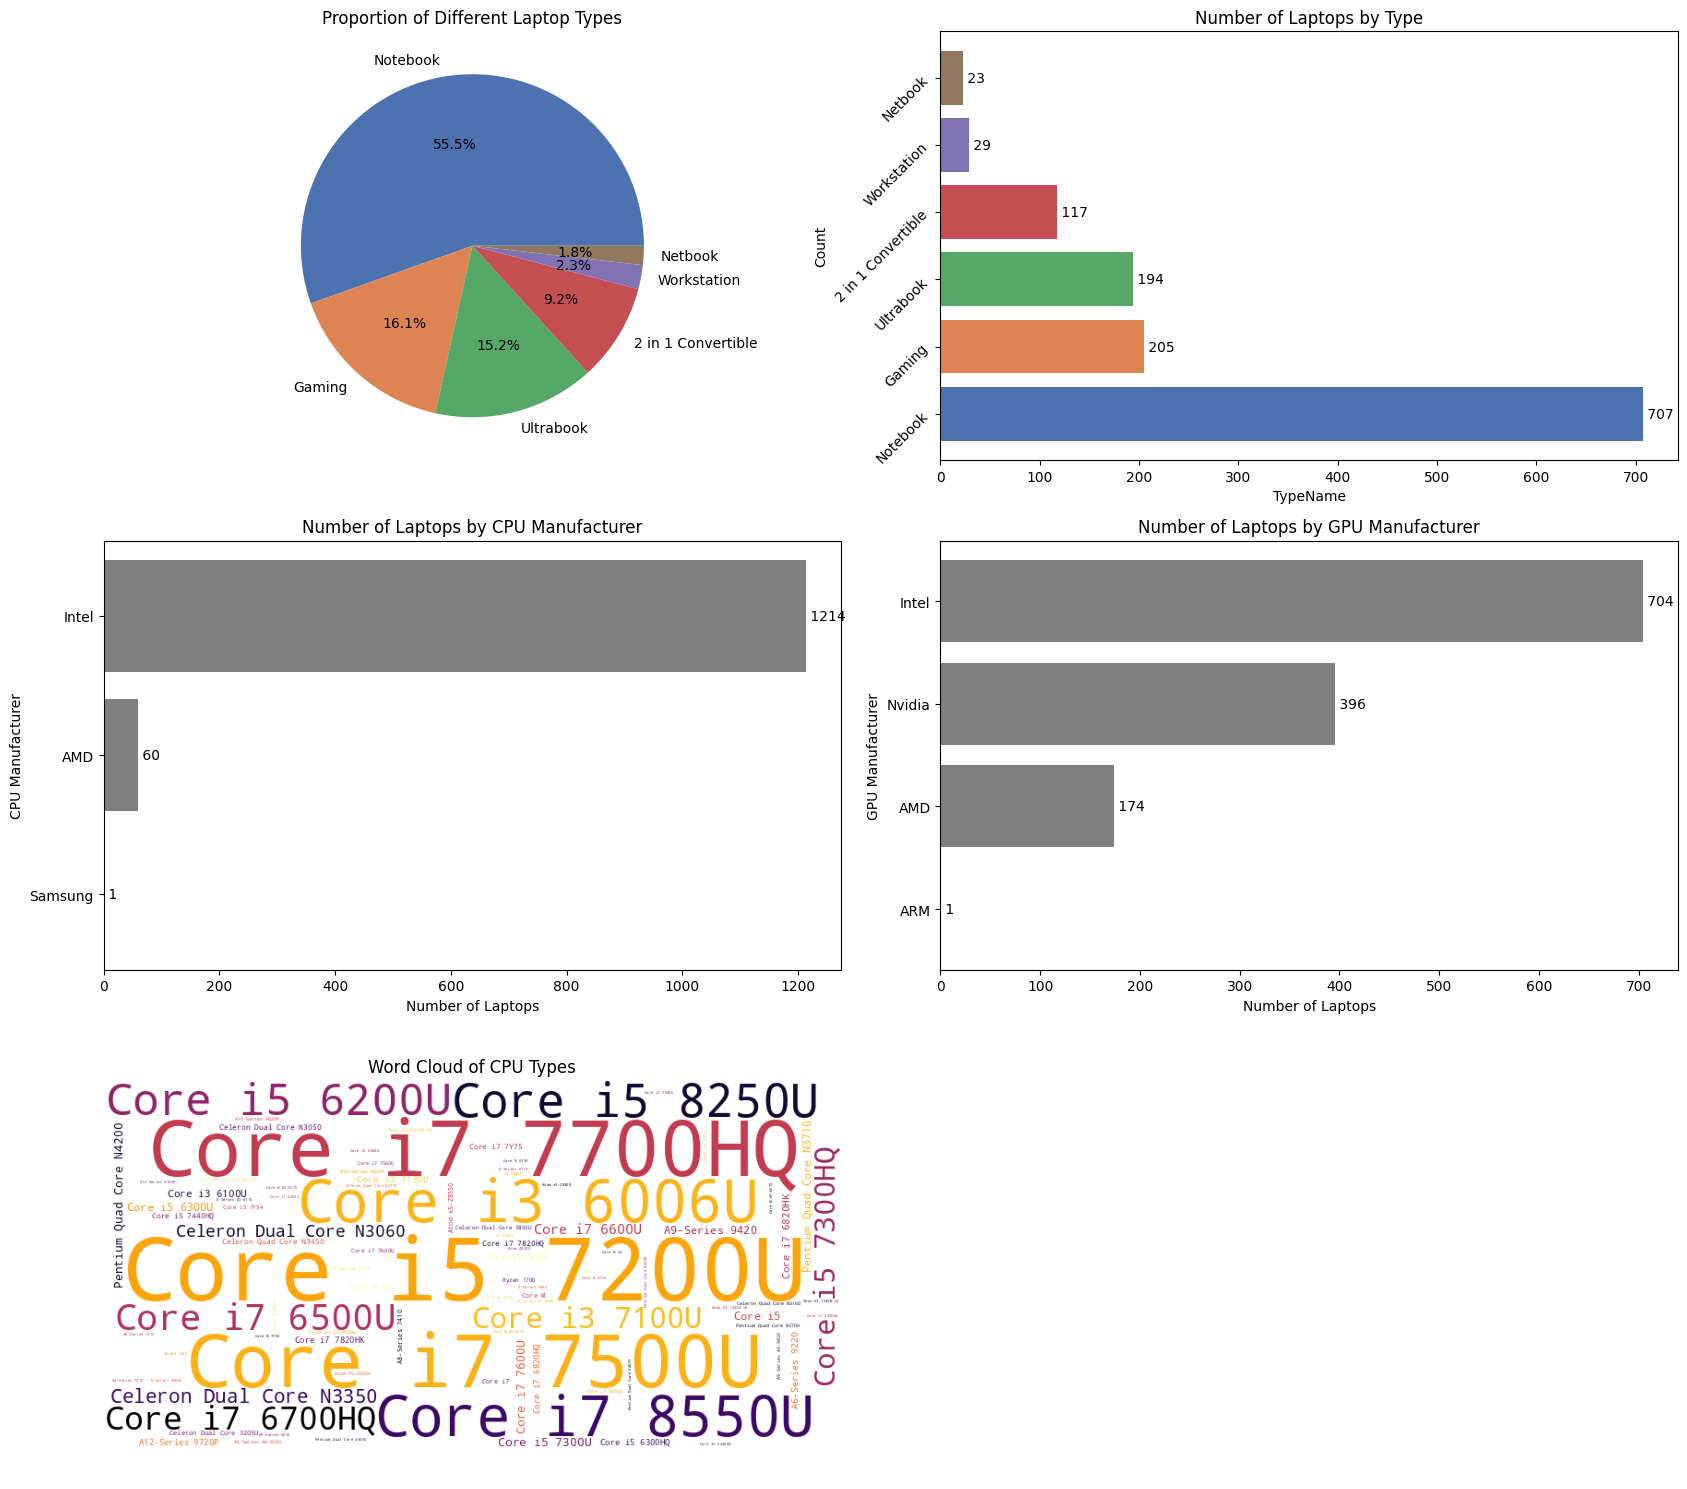

In [185]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(17, 15))
axes = axes.flatten()

# Plot 1
type_count = df['TypeName'].value_counts()
axes[0].pie(type_count.values, 
            labels=type_count.index, 
            autopct='%1.1f%%', 
            colors=sns.color_palette('deep', len(type_count))) 
axes[0].set_title('Proportion of Different Laptop Types')

# Plot 2
plot_horizontal_bar(axes[1], 
                    type_count, 
                    title='Number of Laptops by Type', 
                    xlabel='TypeName', ylabel='Count',
                    color= sns.color_palette('deep'))
axes[1].set_yticklabels(type_count.index, rotation=45)

#Plot 3
cpu_company_count = df["CPU_Company"].value_counts(ascending=True)
plot_horizontal_bar(axes[2], 
                    cpu_company_count, 
                    title='Number of Laptops by CPU Manufacturer', 
                    xlabel='Number of Laptops', ylabel='CPU Manufacturer')

# Plot 4
gpu_company_count = df["GPU_Company"].value_counts().sort_values()
plot_horizontal_bar(axes[3], 
                    gpu_company_count, 
                    title='Number of Laptops by GPU Manufacturer', 
                    xlabel='Number of Laptops', ylabel='GPU Manufacturer')

# Plot 5
cpu_type_counts = df["CPU_Type"].value_counts()
plot_WordCloud(axes[4], 
               cpu_type_counts, 
               title='Word Cloud of CPU Types')

axes[5].axis('off')
plt.tight_layout() 
plt.show()


2025-03-22 18:05:33,053 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-03-22 18:05:33,055 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-03-22 18:05:33,153 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-03-22 18:05:33,155 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-03-22 18:05:33,233 - INFO - Using categorical units to plot a list of strings that are all parsable as 

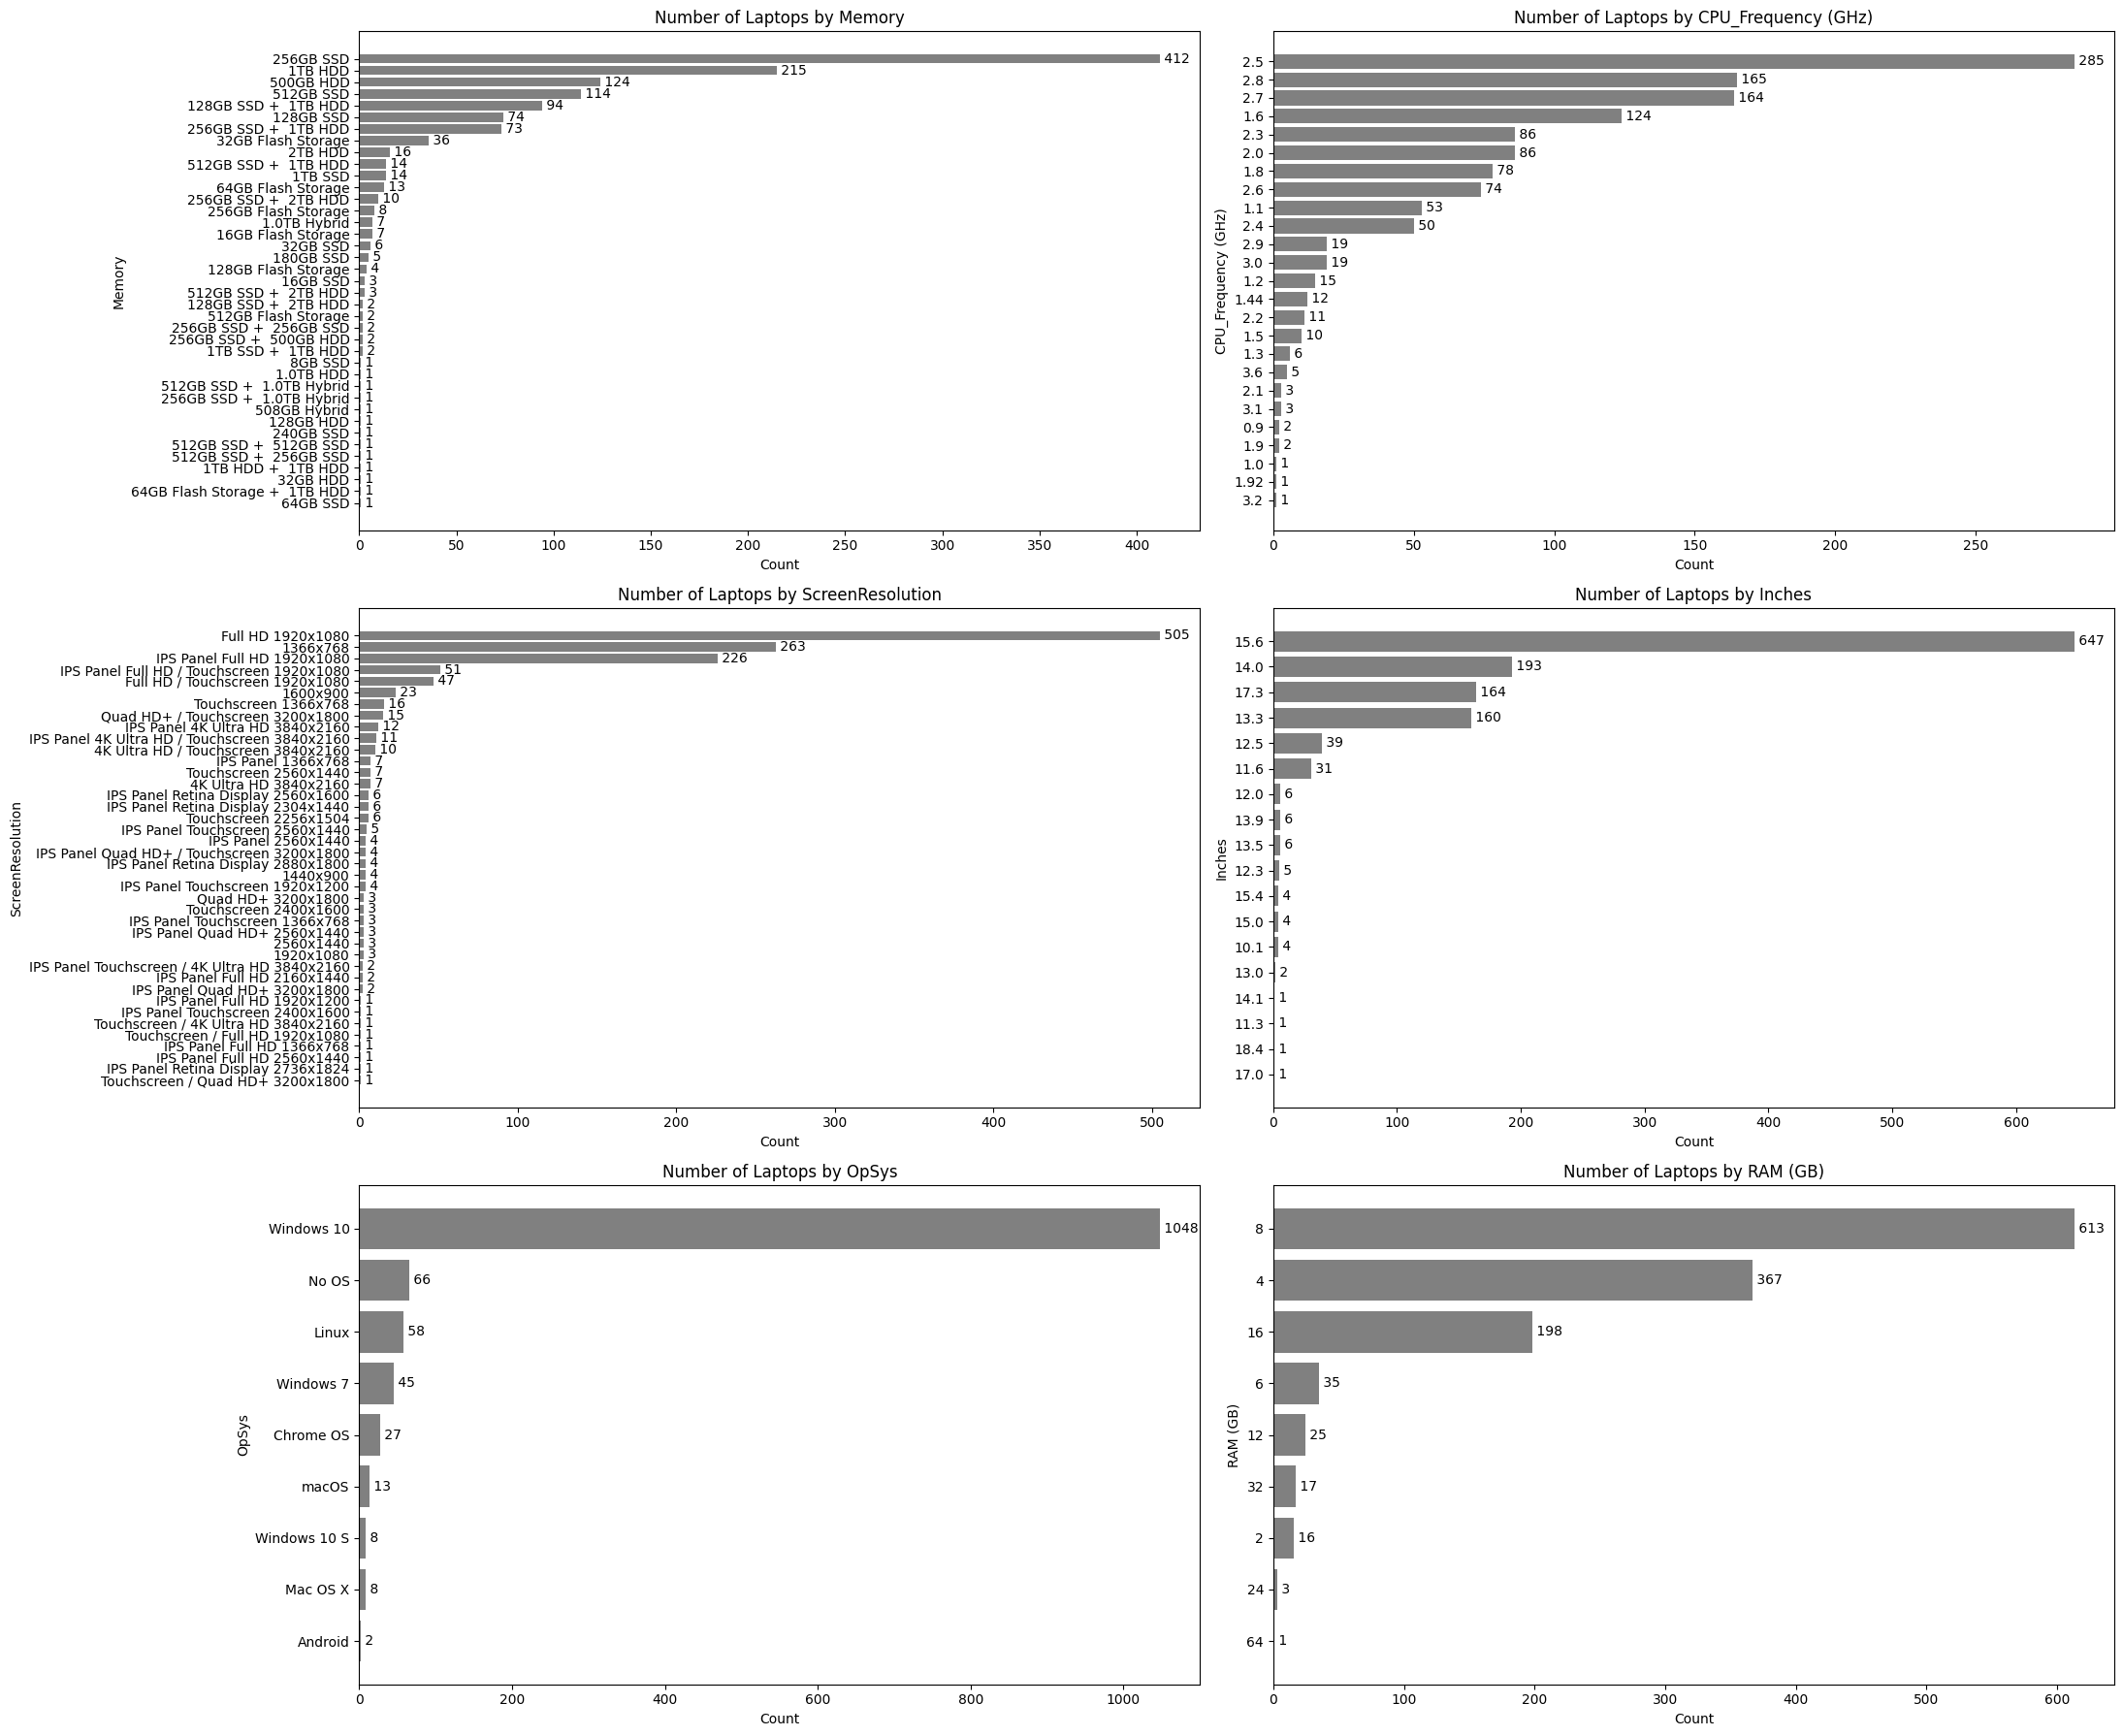

In [186]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(22, 18))
axes = axes.flatten()

for i, column in enumerate(["Memory", "CPU_Frequency (GHz)", "ScreenResolution", "Inches", "OpSys", "RAM (GB)"]):
    data = df[column].value_counts(ascending=True)
    plot_horizontal_bar(axes[i], 
                        data.rename(index=str), 
                        title=f'Number of Laptops by {column}', 
                        xlabel='Count', ylabel=column)

plt.tight_layout() 
plt.show()

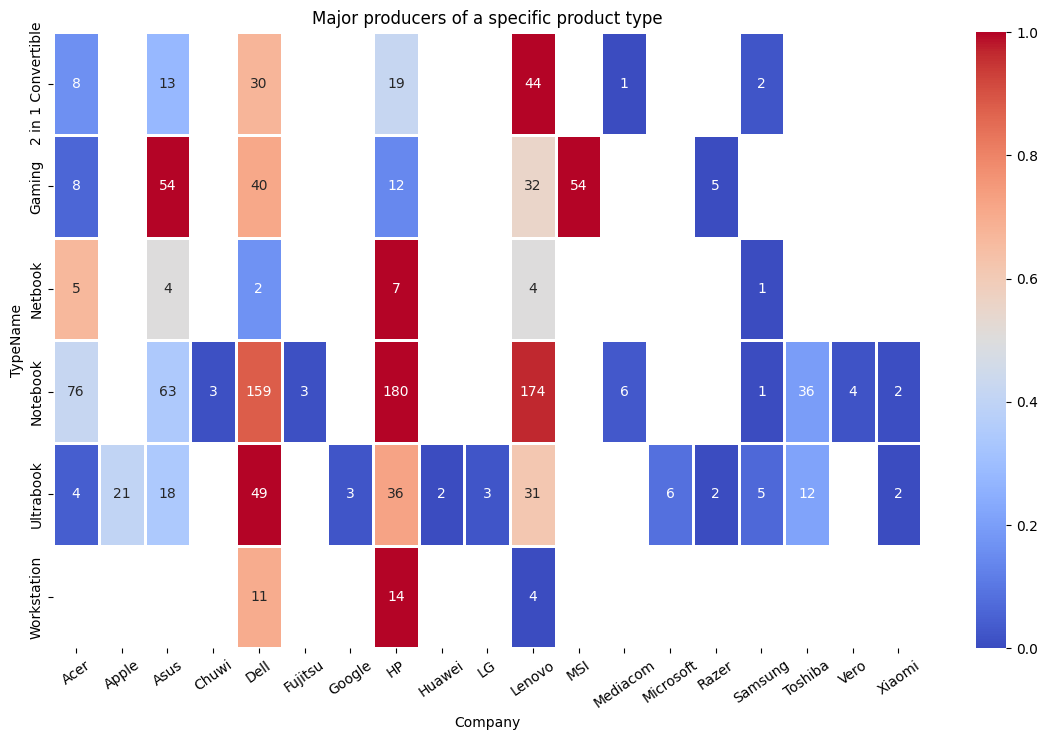

In [187]:
mp_pt = df.groupby(['TypeName', 'Company']).size().unstack()

# Normalize each row
# This to insure that color intensity is calculated independently for each row
normalized_data = mp_pt.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)), axis=1)

plt.figure(figsize=(14, 8))
sns.heatmap(normalized_data, annot=mp_pt, fmt=".0f", cmap="coolwarm", cbar=True, linewidths=2)
plt.title("Major producers of a specific product type")
plt.xlabel("Company")
plt.ylabel("TypeName")
plt.xticks(rotation=35)
plt.show()

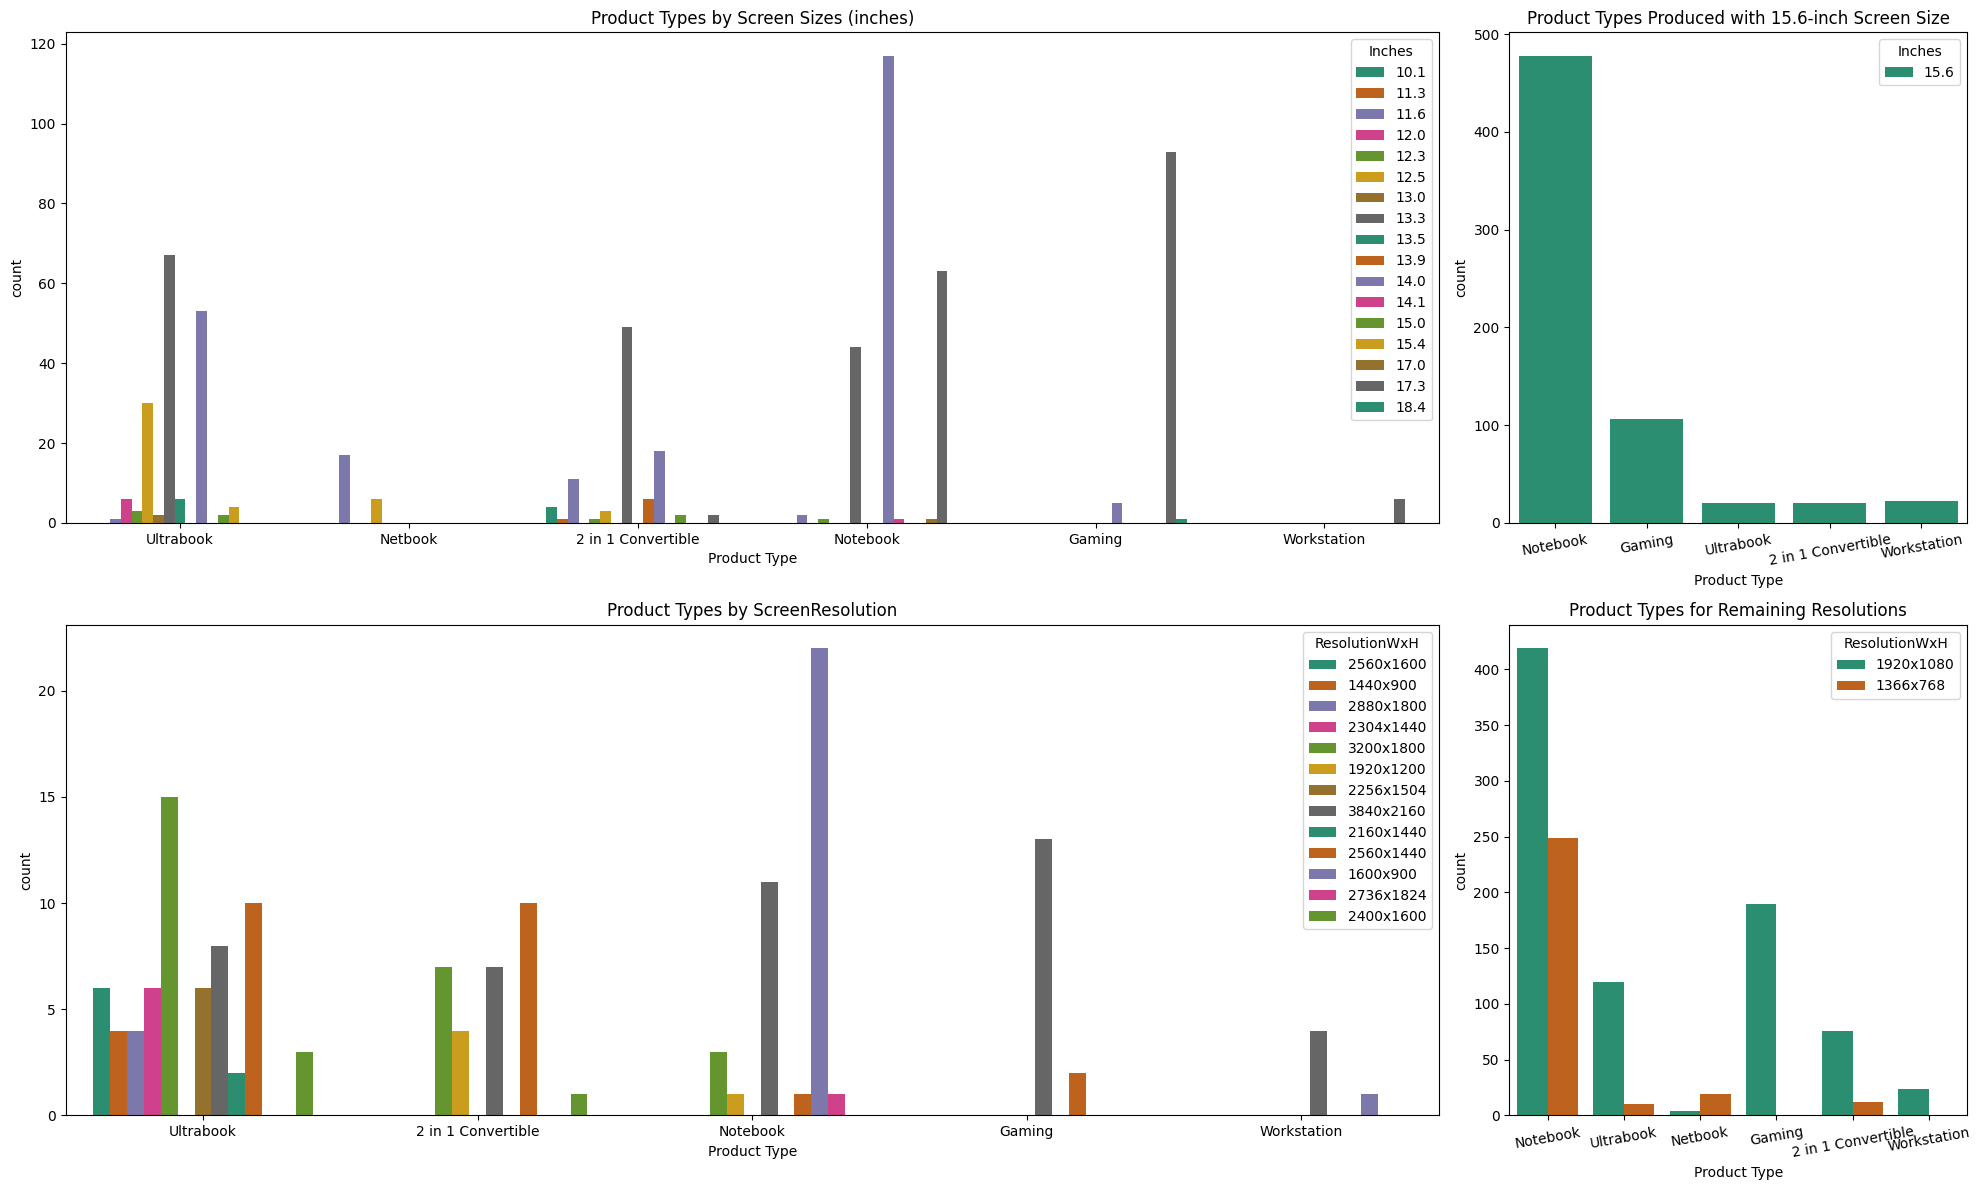

In [188]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12), gridspec_kw={'width_ratios': [3, 1]})
axes = axes.flatten()

df_15_6inc, df_otherinc = df[df['Inches'] == 15.6], df[df['Inches'] != 15.6]
# Plot 1.1: inches/ excluding 15.6 
plot_sns_count(axes[0], x='TypeName', hue='Inches', data=df_otherinc,
               title="Product Types by Screen Sizes (inches)", xlabel="Product Type")

# Plot 1.2: incges/ for 15.6
plot_sns_count(axes[1], x='TypeName', hue='Inches', data=df_15_6inc,
               title="Product Types Produced with 15.6-inch Screen Size", xlabel="Product Type")
axes[1].tick_params(axis='x', rotation=10)


df["ResolutionWxH"] = df['ScreenResolution'].apply(lambda x: x.split()[-1])
df_19_13res, df_other_res = df[df['ResolutionWxH'].isin(["1920x1080", "1366x768"])], df[~df['ResolutionWxH'].isin(["1920x1080", "1366x768"])]
# Plot 2.1: ScreenResolution/ excluding "1920x1080", "1366x768"
plot_sns_count(axes[2], x='TypeName', hue='ResolutionWxH', data=df_other_res,
               title="Product Types by ScreenResolution", xlabel="Product Type")

# Plot 2.2: ScreenResolution/ for "1920x1080", "1366x768"
plot_sns_count(axes[3], x='TypeName', hue='ResolutionWxH', data=df_19_13res,
               title="Product Types for Remaining Resolutions", xlabel="Product Type")
plt.xticks(rotation=10)

plt.tight_layout()
plt.show()

2025-03-22 18:05:39,849 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-03-22 18:05:39,865 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-03-22 18:05:40,978 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-03-22 18:05:40,995 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


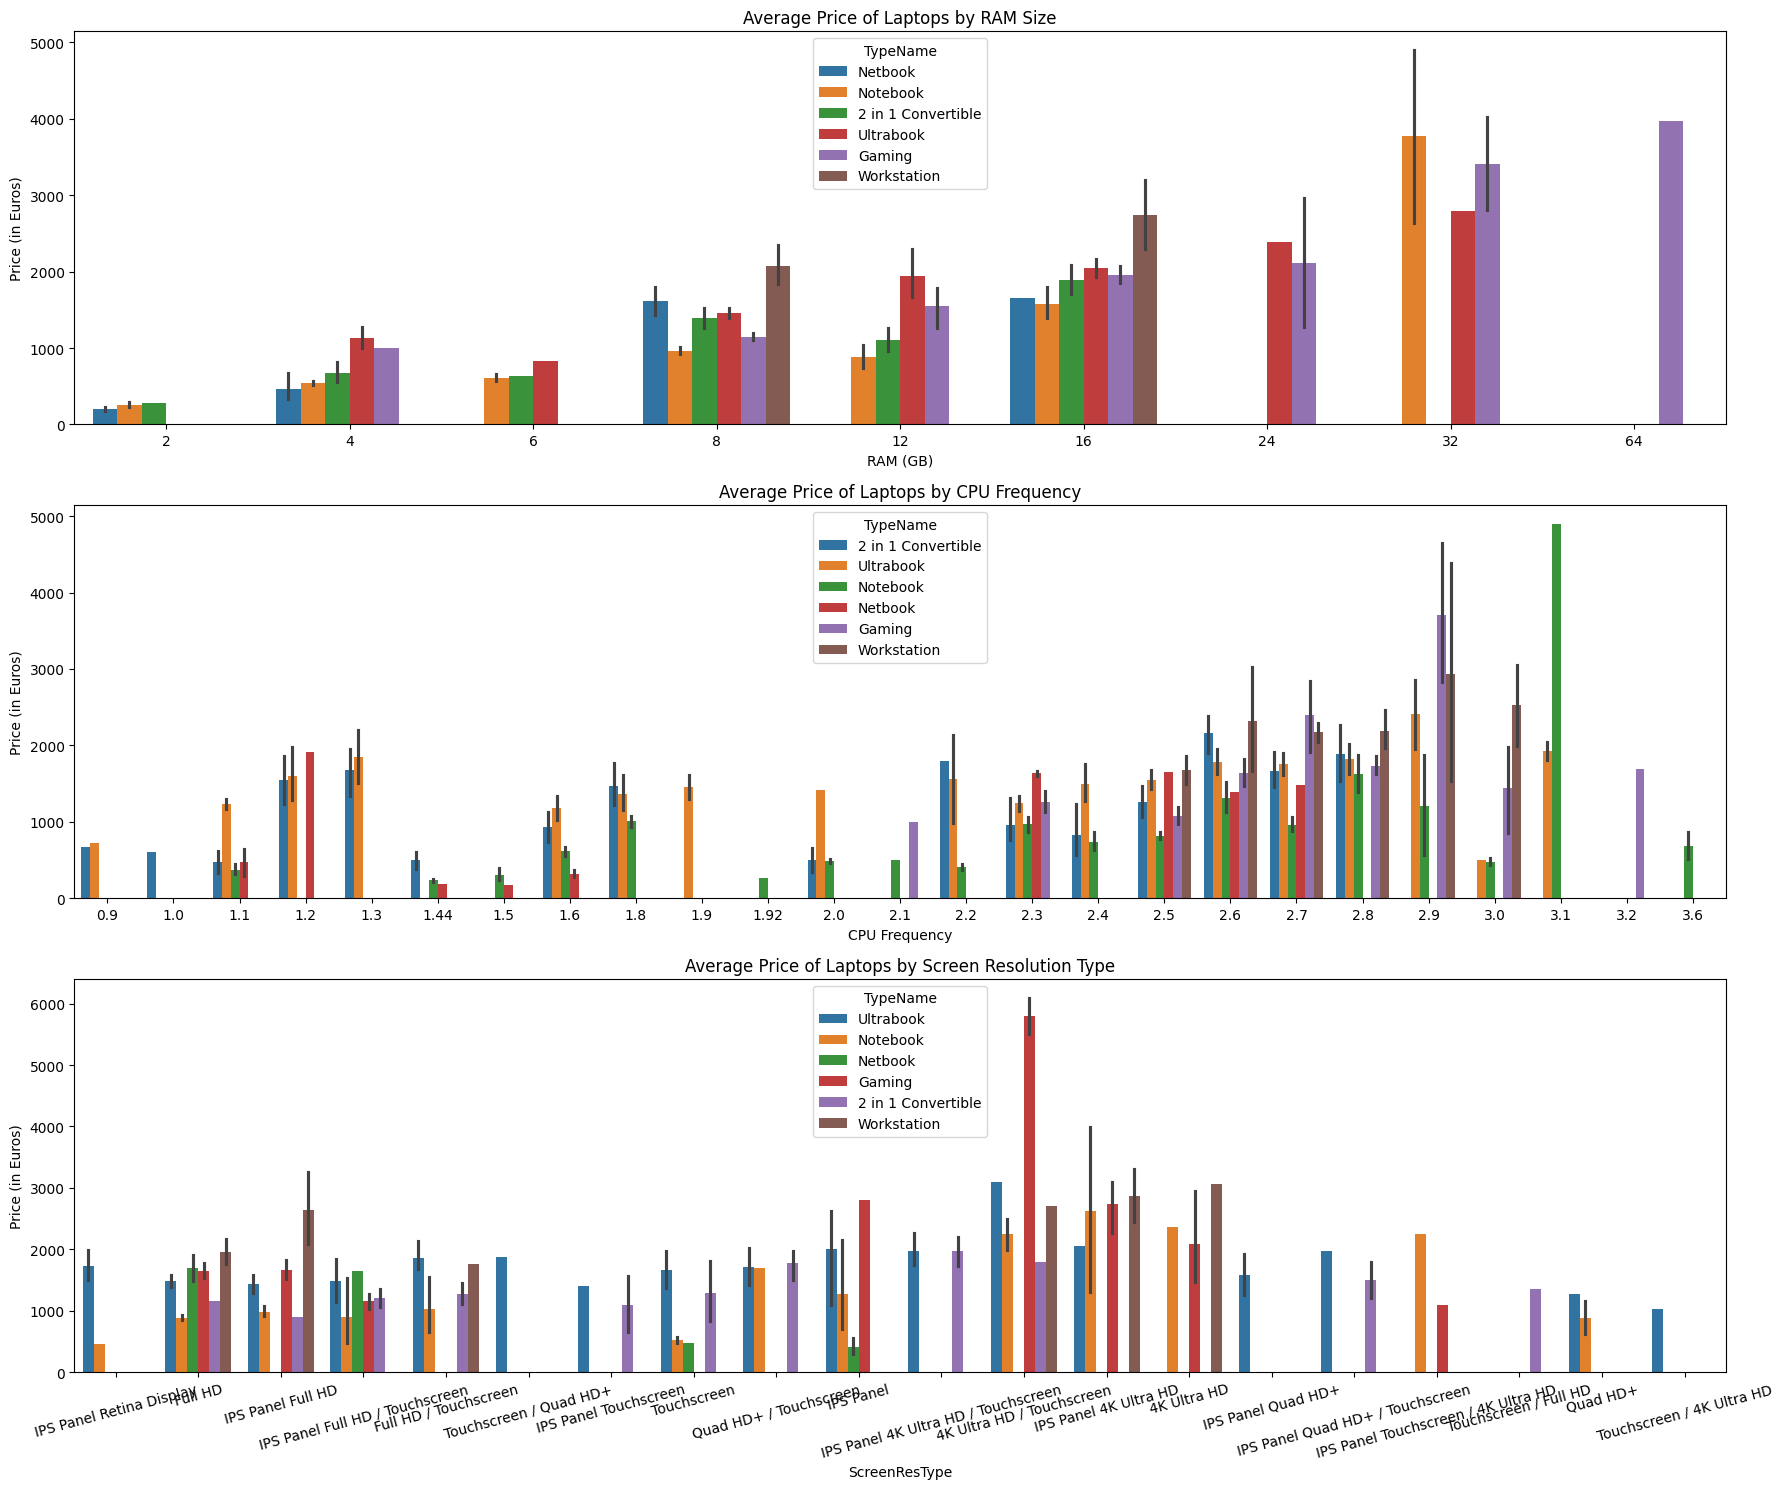

In [189]:
fig, axes = plt.subplots(nrows=3, figsize=(18, 15))

# Plot 1
plot_sns_bar(axes[0], df, x='RAM (GB)', y='Price (Euro)',
             hue='TypeName',legend=True, legLoc="upper center", palette="tab10",
             title='Average Price of Laptops by RAM Size', xlabel='RAM (GB)', ylabel='Price (in Euros)')

# Plot 2
plot_sns_bar(axes[1], df, x='CPU_Frequency (GHz)', y='Price (Euro)',
             hue='TypeName',legend=True, legLoc="upper center", palette="tab10",
             title='Average Price of Laptops by CPU Frequency', xlabel='CPU Frequency', ylabel='Price (in Euros)')

# Plot 3
df['ScreenResType'] = df['ScreenResolution'].apply(lambda x: ' '.join(x.split()[:-1]) if len(x.split()) > 1 else np.nan)
plot_sns_bar(axes[2], df, x='ScreenResType', y='Price (Euro)',
             hue='TypeName',legend=True, legLoc="upper center", palette="tab10",
             title='Average Price of Laptops by Screen Resolution Type', xlabel='ScreenResType', ylabel='Price (in Euros)')
axes[2].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()

In [190]:
company_opSys = df.groupby(['Company', 'TypeName', 'OpSys']).size().reset_index(name='Count')

fig = px.bar(company_opSys, x="Company", y="Count", color="OpSys", 
              barmode="stack", facet_col="TypeName", 
              title="Stacked Bar Chart of Company, Product type and Operating Systems")
fig.show()


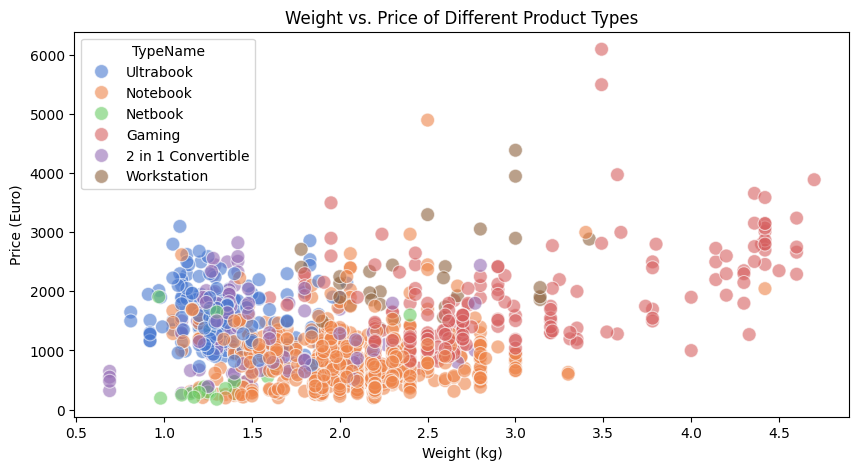

In [191]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Weight (kg)', y='Price (Euro)', data=df, hue='TypeName', palette='muted', s=100, alpha=0.6)

plt.title('Weight vs. Price of Different Product Types')
plt.xlabel('Weight (kg)')
plt.ylabel('Price (Euro)')
plt.show()

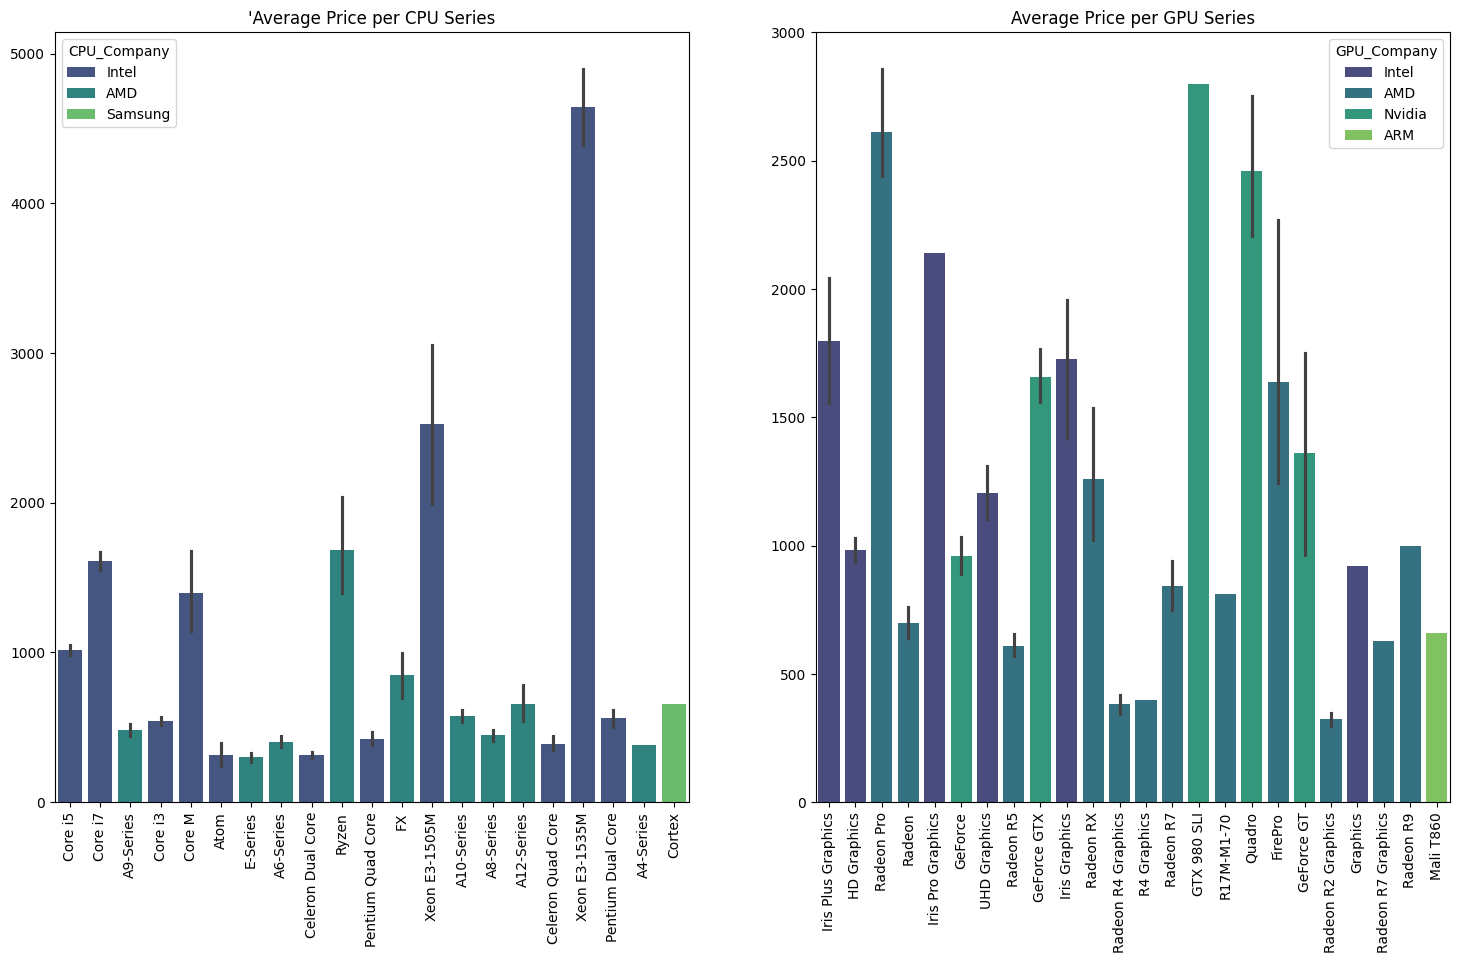

In [192]:
def extract_cpu_cols(x):
    if "Core" in x and len(x.split(" ")) < 3:
        return pd.Series([x, np.nan])
    return pd.Series(x.rsplit(" ", 1))

def extract_gpu_cols(x):
    sp = x.rsplit(" ", 1)
    if sp[-1] == "Ti":
        sp = x.rsplit(" ", 2)
        return pd.Series([sp[0], " ".join(sp[-2:])])
    elif any(ch.isdigit() for ch in sp[-1]):
        return pd.Series(sp)
    return pd.Series([x, np.nan])

df[["CPU_Series", "CPU_Model"]] = df["CPU_Type"].apply(extract_cpu_cols)
# df.head(3)
    
df[["GPU_Series", "GPU_Model"]] = df["GPU_Type"].apply(extract_gpu_cols)
# df.head(3)


fig, axes = plt.subplots(ncols=2, figsize=(18, 10))
# Plot 1: for CPU
plot_sns_bar(axes[0], df, x= "CPU_Series", y= "Price (Euro)", hue="CPU_Company", legend= True,
             legLoc= "upper left", title= "'Average Price per CPU Series")
axes[0].tick_params(axis="x", rotation=90) 

# Plot 2: for CPU
plot_sns_bar(axes[1], df, x="GPU_Series", y="Price (Euro)", hue="GPU_Company", legend= True,
             legLoc= "upper right", title= "Average Price per GPU Series")
axes[1].tick_params(axis="x", rotation=90) 
plt.show()

In [197]:
import re

def extract_memory_cols(x):
    def get_memory_details(mem):
        mem_size, mem_type = mem.split(" ", 1)

        match = re.match(r"(\d*\.?\d+)([a-zA-Z]+)", mem_size)
        if match:
            number, unit = float(match.group(1)), match.group(2).upper()
            # Convert all units to GB
            if unit == "TB":
                number *= 1024  
            elif unit == "MB":
                number /= 1024 
            elif unit == "KB":
                number /= (1024 ** 2) 
            elif unit != "GB":
                raise ValueError(f"Invalid memory unit: {unit}")
        else: 
            raise ValueError(f"Invalid memory format: {mem_size}")
        
        return int(number), mem_type
    
    if "+" in x:
        l, r = [_.strip() for _ in x.split("+")]
        size1, mem_type1 = get_memory_details(l)
        size2, mem_type2 = get_memory_details(r)
        return size1 + size2, " & ".join([mem_type1, mem_type2])
    else:
        return get_memory_details(x)
        

df[["Memory_Size", "Memory_Type"]] = df["Memory"].apply(extract_memory_cols).apply(pd.Series)
df.tail(3)
    

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,...,Weight (kg),Price (Euro),ResolutionWxH,ScreenResType,CPU_Series,CPU_Model,GPU_Series,GPU_Model,Memory_Size,Memory_Type
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel,Celeron Dual Core N3050,1.6,2,64GB Flash Storage,...,1.50,229.0,1366x768,NaN,Celeron Dual Core,N3050,HD Graphics,NaN,64,Flash Storage
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel,Core i7 6500U,2.5,6,1TB HDD,...,2.19,764.0,1366x768,NaN,Core i7,6500U,Radeon R5,M330,1024,HDD
1274,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel,Celeron Dual Core N3050,1.6,4,500GB HDD,...,2.20,369.0,1366x768,NaN,Celeron Dual Core,N3050,HD Graphics,NaN,500,HDD


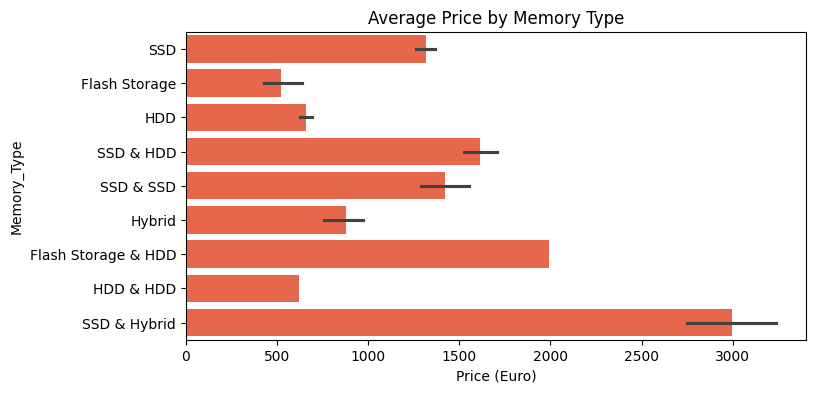

In [198]:
# Plot 1
product_memType = df.groupby(['Memory_Type', 'TypeName', df["Memory_Size"].astype(str)]).size().reset_index(name='Count')
fig = px.bar(product_memType, x="Memory_Type", y="Count", color="Memory_Size",
              barmode="stack", facet_col="TypeName", 
              title="Stacked Bar Chart of Memory Type, Memory Size, and Laptop Type")
fig.show()

# Plot 2
plt.figure(figsize=(8, 4))  # Set figure size
sns.barplot(data=df, y="Memory_Type", x="Price (Euro)", color="#FF5733")
plt.title("Average Price by Memory Type")
plt.show()

### Feature Engineering

In [199]:
df.head(3)

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,...,Weight (kg),Price (Euro),ResolutionWxH,ScreenResType,CPU_Series,CPU_Model,GPU_Series,GPU_Model,Memory_Size,Memory_Type
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,...,1.37,1339.69,2560x1600,IPS Panel Retina Display,Core i5,NaN,Iris Plus Graphics,640,128,SSD
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,...,1.34,898.94,1440x900,NaN,Core i5,NaN,HD Graphics,6000,128,Flash Storage
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,...,1.86,575.00,1920x1080,Full HD,Core i5,7200U,HD Graphics,620,256,SSD


In [ ]:
df[['Reso_W', 'Reso_H']] = df['ResolutionWxH'].str.split("x", expand=True)
df['Reso_W'] = df['Reso_W'].astype(int)
df['Reso_H'] = df['Reso_H'].astype(int)

# Pixels per Inch (PPI)
df['PPI'] = np.sqrt(df['Reso_W']**2 + df['Reso_H']**2) / df['Inches']


df.drop(columns=['ResolutionWxH', "ScreenResolution", "Memory"])

<Axes: >

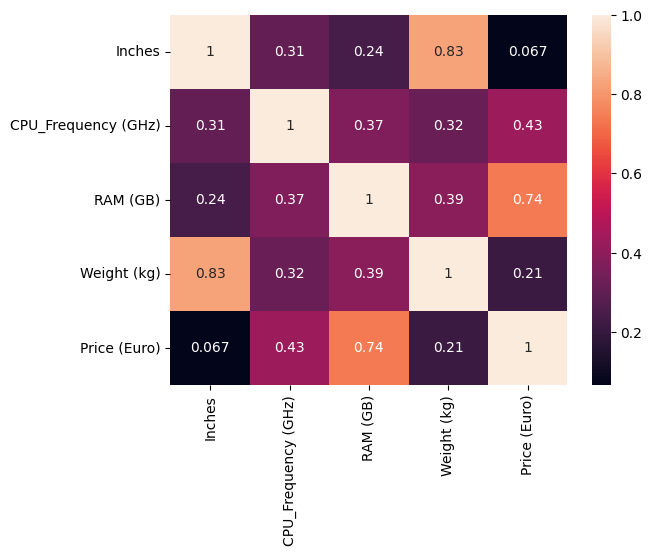

In [99]:
sns.heatmap(df[numerical_columns].corr(), annot=True)

In [ ]:
df["Inches-Weight Ratio"] = df['Inches'] / df['Weight (kg)']

In [11]:
df_train = shuffle(df_train, random_state=1)

# (60% train, 20% val, 20% test)
train_set, temp_set = train_test_split(df_train, test_size=0.4, random_state=1)
val_set, test_set = train_test_split(temp_set, test_size=0.5, random_state=1)